In [1]:
import os, json
import pandas as pd
import numpy as np

path_to_json = '/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/55'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
print(json_files) 

['43.json']


In [2]:
filepath = '/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/55/'
for file in json_files:
    print(filepath + file)

/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/55/43.json


In [3]:
filepath = '/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/55/'

match_list=[]

for file in json_files:
    df_matches=pd.read_json(filepath + file)
    match_list.extend(df_matches['match_id'].values)

In [4]:
print(match_list)

[3788753, 3788765, 3795107, 3795221, 3795506, 3794688, 3794692, 3794686, 3794687, 3794685, 3788774, 3788771, 3788772, 3788768, 3788767, 3788763, 3788759, 3788758, 3788757, 3788745, 3788746, 3794691, 3794690, 3794689, 3788769, 3788761, 3788764, 3788766, 3788754, 3788755, 3788773, 3788762, 3788760, 3788747, 3788741, 3795220, 3788770, 3795108, 3795187, 3795109, 3788756, 3788749, 3788750, 3788748, 3788751, 3788752, 3788742, 3788775, 3788776, 3788743, 3788744]


In [5]:
def dict_to_dataframe(a):
    dataframe = df_match[a].apply(pd.Series)
    dataframe.columns = [str(a) + "_" + str(col) for col in dataframe.columns]
    return dataframe 

filepath = '/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/55/'

appended_data = []

for file in json_files:
    df_match = pd.read_json(filepath + file)
    
    df_home_team = dict_to_dataframe("home_team")
    df_away_team = dict_to_dataframe("away_team")

    frames = [df_match, df_home_team, df_away_team]

    df = pd.concat(frames, axis = 1)

    df = df[['match_id', 'home_team_home_team_name', 'away_team_away_team_name']]
    appended_data.append(df)
# see pd.concat documentation for more info
appended_data = pd.concat(appended_data)

In [6]:
appended_data

,match_id,home_team_home_team_name,away_team_away_team_name
0,3788753,Finland,Russia
1,3788765,Switzerland,Turkey
2,3795107,Belgium,Italy
3,3795221,England,Denmark
4,3795506,Italy,England
5,3794688,England,Germany
6,3794692,Sweden,Ukraine
7,3794686,Croatia,Spain
8,3794687,Belgium,Portugal
9,3794685,Italy,Austria


In [7]:
shot_appended_data = []
for match in match_list:

    filepath = "/Users/aritramajumdar/Downloads/statsbomb/open-data/data/events/"
    match_id = str(match)

    df = pd.read_json(filepath+match_id+".json")


    cols = ['tactics', 'related_events']
    df = df.drop(cols, axis = 1)


    def dict_to_dataframe(a):
        dataframe = df[a].apply(pd.Series)
        dataframe.columns = [str(a) + "_" + str(col) for col in dataframe.columns]
        return dataframe 


    df_type = dict_to_dataframe("type")
    df_possession_team = dict_to_dataframe("possession_team")
    df_play_pattern = dict_to_dataframe("play_pattern")
    df_team = dict_to_dataframe("team")
    df_player = dict_to_dataframe("player")
    df_position = dict_to_dataframe("position")
    df_pass = dict_to_dataframe("pass")
    df_shot = dict_to_dataframe("shot")


    
    a = ['type', 'possession_team', 'play_pattern', 'team',
       'player', 'position', 'pass', 'shot']

    df = df.drop(a, axis = 1)

    frames = [df_type, df_play_pattern, df_team,
             df_player, df_position, df_pass, df_shot, df_possession_team]

    df_total = pd.concat(frames, axis = 1)

    frames1 = [df, df_total]

    df_final = pd.concat(frames1, axis = 1)

    shot_col = [col for col in df_total if col.startswith('shot')]
    
    df_extra = df_final[['id', 'index', 'period', 'timestamp', 'minute', 
                     'second', 'possession', 'duration', 'location', 
                     'under_pressure', 'type_name', 'play_pattern_name',
                     'pass_height', 'pass_type', 'possession_team_name', 'player_id', 'player_name']]

    df_shot = df_final[shot_col]


    frames2 = [df_extra, df_shot]
    shots = pd.concat(frames2, axis = 1)

    b = ['shot_0','shot_key_pass_id']
    shots = shots.drop(b, axis = 1)


    def dict_to_dataframe(a):
        dataframe = shots[a].apply(pd.Series)
        dataframe.columns = [str(a) + "_" + str(col) for col in dataframe.columns]
        return dataframe 

    df_shot_type = dict_to_dataframe("shot_type")
    df_shot_technique = dict_to_dataframe("shot_technique")
    df_shot_outcome = dict_to_dataframe("shot_outcome")
    df_shot_body_part = dict_to_dataframe("shot_body_part")
    df_pass_height = dict_to_dataframe("pass_height")
    df_pass_type = dict_to_dataframe("pass_type")


    frames3 = [df_shot_type, df_shot_technique, df_shot_outcome, df_shot_body_part, df_pass_height, df_pass_type]

    df_shot_data = pd.concat(frames3, axis = 1)

    c = ["shot_type", "shot_technique", "shot_outcome", "shot_body_part", "pass_height", "pass_type"]

    shots = shots.drop(c, axis = 1)

    frames4 = [shots, df_shot_data]

    shots_data = pd.concat(frames4, axis=1)

    shots_data = shots_data[['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession', 
                             'possession_team_name', 'player_id', 'player_name',
                           'duration', 'location', 'under_pressure', 'type_name',
                            'play_pattern_name', 'pass_height_name',
                           'shot_end_location', 'shot_freeze_frame',
                           'shot_type_name', 'shot_technique_name', 
                           'shot_outcome_name', 'shot_body_part_name','shot_statsbomb_xg']]


    shots_data['previous_type_name'] = shots_data['type_name'].shift(1)
    shots_data['previous_pass_height_name'] = shots_data['pass_height_name'].shift(1)
    shots_data['previous_pass_height_name'] = shots_data['previous_pass_height_name'].ffill(axis = 0)

    shots_data = shots_data[shots_data['type_name'] == 'Shot']

    shots_data["location_x"] = shots_data["location"].str[0]
    shots_data["location_y"] = shots_data["location"].str[1]

    shots_data["shot_end_location_x"] = shots_data["shot_end_location"].str[0]
    shots_data["shot_end_location_y"] = shots_data["shot_end_location"].str[1]


    d = ['type_name', 'pass_height_name', 'location', 'shot_end_location']
    shots_data = shots_data.drop(d, axis = 1)  
    
    shots_data['match_id'] = int(match)
    shot_appended_data.append(shots_data)
    

shot_appended_data = pd.concat(shot_appended_data)

In [8]:
shots_data_final = pd.merge(shot_appended_data, appended_data, on='match_id')
shots_data_final['home_away'] = np.where((shots_data_final['possession_team_name'] == shots_data_final['home_team_home_team_name']), 
                                         'Home', 'Away')


#e = ['home_team_home_team_name', 'away_team_away_team_name']
#shots_data_final = shots_data_final.drop(e, axis = 1)

In [9]:
shots_data_final

,id,index,period,timestamp,minute,second,possession,possession_team_name,player_id,player_name,...,previous_type_name,previous_pass_height_name,location_x,location_y,shot_end_location_x,shot_end_location_y,match_id,home_team_home_team_name,away_team_away_team_name,home_away
0,91f2f8aa-4ee8-4593-97a6-1a7862a7cca5,50,1,2022-11-24 00:00:29.166,0,29,4,Russia,20845.0,Magomed Ozdoev,...,Pressure,Ground Pass,99.9,48.2,103.3,46.6,3788753,Finland,Russia,Away
1,0bb2daca-ab0b-497c-ac59-3cc559be6fb7,431,1,2022-11-24 00:09:42.014,9,42,16,Russia,20845.0,Magomed Ozdoev,...,Ball Receipt*,Ground Pass,109.6,49.0,120.0,43.3,3788753,Finland,Russia,Away
2,1215b0dc-81fb-4416-b9a6-0faf150a4e8d,856,1,2022-11-24 00:19:53.988,19,53,37,Finland,9725.0,Joel Pohjanpalo,...,Carry,Ground Pass,107.2,45.3,108.1,44.8,3788753,Finland,Russia,Home
3,1ce72d1b-a7c5-4eb3-965f-61621b798f35,865,1,2022-11-24 00:20:38.796,20,38,38,Finland,26939.0,Joona Toivio,...,Duel,High Pass,110.9,29.6,120.0,30.9,3788753,Finland,Russia,Home
4,7aa54ce6-106a-4e26-9fb1-77aa0d76f793,1082,1,2022-11-24 00:29:01.200,29,1,48,Russia,5195.0,Artem Dzyuba,...,Duel,High Pass,114.8,42.1,115.7,41.7,3788753,Finland,Russia,Away
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,1d38ebb6-a02c-46d7-84c0-037d02c9c43f,2612,2,2022-11-24 00:33:51.461,78,51,129,Wales,3086.0,Ben Davies,...,Ball Receipt*,Ground Pass,95.5,31.6,120.0,28.9,3788744,Wales,Switzerland,Home
1285,49e47b32-f7c6-497b-8b36-89d116a3e00d,2658,2,2022-11-24 00:35:14.850,80,14,132,Switzerland,5538.0,Denis Lemi Zakaria Lako Lado,...,Ball Receipt*,Ground Pass,99.4,48.8,111.5,40.8,3788744,Wales,Switzerland,Away
1286,ed50056d-0dcf-4c4d-af1b-acbcfa42ec26,2692,2,2022-11-24 00:36:45.145,81,45,135,Wales,22074.0,Joseff Morrell,...,Ball Recovery,High Pass,94.9,40.8,96.5,40.7,3788744,Wales,Switzerland,Home
1287,1fda187c-4b9e-4dbf-b9e1-6f12f03edb69,2837,2,2022-11-24 00:43:16.732,88,16,141,Wales,6399.0,Gareth Frank Bale,...,Ball Receipt*,High Pass,104.5,32.4,105.9,33.1,3788744,Wales,Switzerland,Home


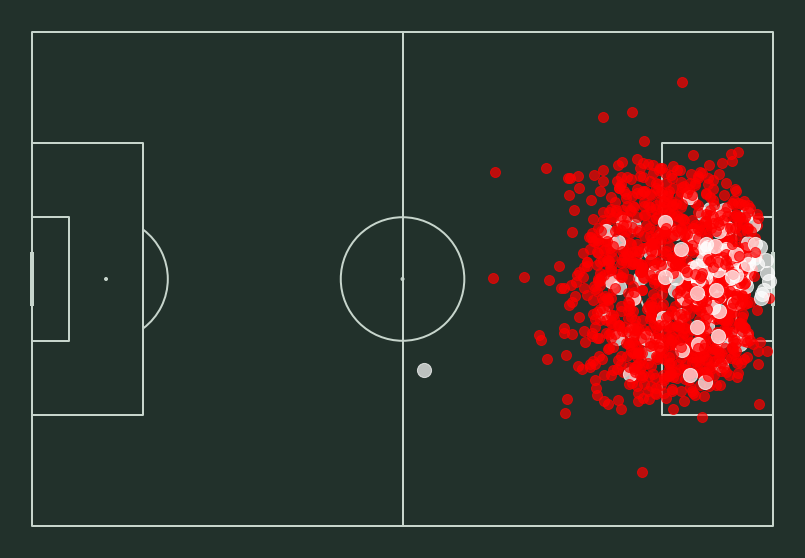

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

from mplsoccer.pitch import Pitch
from mplsoccer.pitch import VerticalPitch

fig, ax = plt.subplots(figsize=(20, 10))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

"""
#The statsbomb pitch from mplsoccer
pitch = VerticalPitch(pitch_type='statsbomb',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True, half = True)
"""
# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc', 
              figsize=(16, 11), constrained_layout=True, tight_layout=False)


pitch.draw(ax = ax)
plt.gca().invert_yaxis()

for x in range(len(shots_data_final['location_x'])):
    if shots_data_final['shot_outcome_name'].iloc[x] == 'Goal':
        #plt.plot((passes['x'].iloc[x],passes['end_x'].iloc[x]),(passes['y'].iloc[x],passes['end_y'].iloc[x]),color='green')
        plt.scatter(shots_data_final['location_x'].iloc[x], shots_data_final['location_y'].iloc[x], c = 'w', s=200, alpha = 0.7)
    else:
        plt.scatter(shots_data_final['location_x'].iloc[x], shots_data_final['location_y'].iloc[x], c = 'r', s=100, alpha = 0.7)
        
    

In [11]:
shots_data_final.to_excel("UEURO.xlsx")